In [1]:
import pandas
pandas.set_option('max_rows', 10)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns
from scipy.stats import linregress# very nice plotting package

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

# import data
data1 = [2000, 5000, 7050, 10125, 12345, 17350, 13250, 12200, 9125]
data2 = [28450, 23438, 36380, 12450, 16100, 21350, 39400, 41000, 14325]
#print data
data1
data2

[28450, 23438, 36380, 12450, 16100, 21350, 39400, 41000, 14325]

In [8]:
#create a list to give out values



#calculate descriptive stats

print(np.mean(data1))
print(np.std(data1))
print(np.mean(data2))
print(np.std(data2))
mean_secondperiod = data1.mean()
median_secondperiod = data1.median()
sd_secondperiod = data1.std()

print('- Mean =', mean_secondperiod)
print('- Median =', median_secondperiod)
print('- Standard deviation =', sd_secondperiod)
print('- Range =', max(secondperiod_list) - min(secondperiod_list))
secondperiod_list = data1.tolist()
mode_secondperiod = stats.mode(secondperiod_list)[0][0]
print('- Mode =', mode_secondperiod)
final_list = data2.tolist()

9827.222222222223
4386.077791724826
25877.0
10350.927000891166


AttributeError: 'list' object has no attribute 'mean'

In [18]:
mode_final = stats.mode(final_list)[0][0]
mean_final = data['G3'].mean()
median_final = data['G3'].median()
sd_final = data['G3'].std()

print('- Mean =', mean_final)
print('- Median =', median_final)
print('- Mode =', mode_final)
print('- Standard deviation =', sd_final)
print('- Range =', max(final_list) - min(final_list))



- Mean = 10.415189873417722
- Median = 11.0
- Mode = 10
- Standard deviation = 4.5814426109978434
- Range = 20


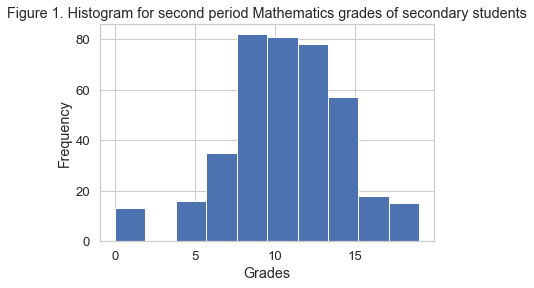

In [26]:
secondperiod = list(data['G2'].values)
final = list(data['G3'].values)
#plot histograms
plt.hist(secondperiod, bins = 10)
plt.title('Figure 1. Histogram for second period Mathematics grades of secondary students')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()


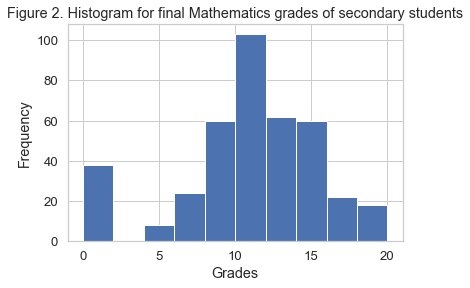

In [28]:
plt.hist(final, bins = 10)
plt.title('Figure 2. Histogram for final Mathematics grades of secondary students')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

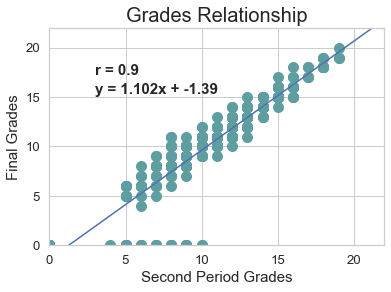

In [29]:
def plotscatter(x, y, title, color, xmax):
    plt.figure()
    plt.scatter(x, y, s=100, c=color) #choose the type of data visualization - here is scatter plot
    plt.title(title, fontsize=20) #name a title
    plt.xlabel('Second Period Grades', fontsize=15)
    plt.ylabel('Final Grades', fontsize=15)
    plt.xlim(0,xmax) #put a limit to the horizontal and vertical axes
    plt.ylim(0,22)

    # calculates slope, intercept, r_value for dataset
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot([0, xmax], [intercept, slope * xmax + intercept])

    # adds legend to figure with regression line equation
    equation = 'y = ' + str(round(slope,3)) + 'x' + ' + ' + str(round(intercept,2))
    rvalue = 'r = ' + str(round(r_value,2))
    #locate where to put the correlation coefficient and the regression equation
    plt.text(3, 15.3, equation,fontsize=15,fontweight='bold') 
    plt.text(3, 17.3, rvalue,fontsize=15,fontweight='bold')

#give out the plot with results
plotscatter(secondperiod, final, 'Grades Relationship', 'cadetblue', 22)

In [2]:
def regression_model(column_x, column_y):
    # this function uses built in library functions to create a scatter plot,
    # plots of the residuals, compute R-squared, and display the regression eqn

    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    # extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) # scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) # residual plot
    ax2.set(ylabel='Residuals') #name the values to be Residuals
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure() # histogram
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram

    # print the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)

R-squared =  0.819
Regression equation: G3 =  1.102 * G2 +  -1.393


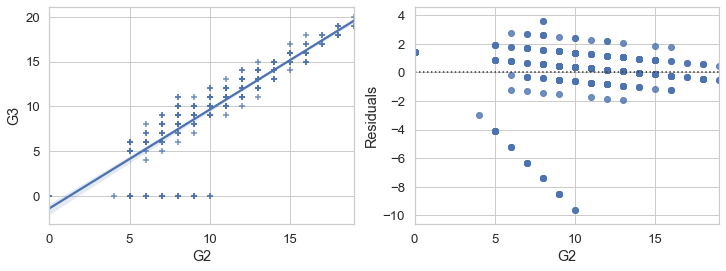

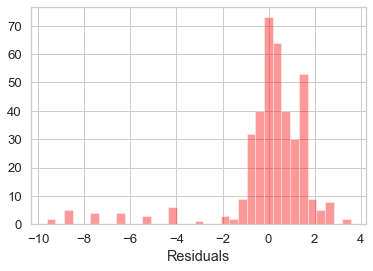

In [6]:
regression_model('G2','G3')

In [8]:
#call a variable and assign a column in the dataset to it
predictor_vars = ['G2']

X = data[predictor_vars]
X = statsmodels.add_constant(X) # if excluded, the intercept would default to 0
y = data['G3']
model = statsmodels.OLS(y, X).fit()
model.summary() #print out the summary of all statistics

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1776.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          7.63e-148
Time:                        16:22:10   Log-Likelihood:                -823.83
No. Observations:                 395   AIC:                             1652.
Df Residuals:                     393   BIC:                             1660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3928      0.297     -4.690      0.000      -1.977      -0.809
G2             1.1021      0.026     42.139      0.000       1.051       1.154
==============================================================================
Omnibus:                      246.646   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.620
Skew:                          -2.699   Prob(JB):                         0.00
Kurtosis:                      11.877   Cond. No.                         34.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""